#Importing required libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.utils import to_categorical

#Import, loading and normalizing MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_test,X_train=X_test/255.0,X_train/255.0
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


#Visualising Dataset

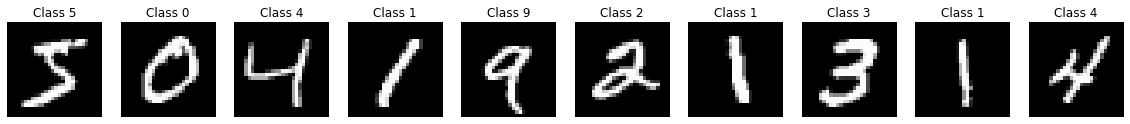

In [3]:
n = 10
plt.figure(figsize=(n*2,2))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Class {}".format(y_train[i]))
    plt.axis('off')
plt.show()

#Shape

In [4]:
y_train.shape=(60000,)
Y_train.shape=(60000,10)

print(y_train.shape)
print(Y_train.shape)
print(y_test.shape)
print(Y_test.shape)
print(X_test.shape)
print(X_train.shape)

(60000,)
(60000, 10)
(10000,)
(10000, 10)
(10000, 28, 28)
(60000, 28, 28)


#Model Definition

In [5]:
model=Sequential()
model.add(LSTM(64,input_shape=(28,28)))
model.add(Dense(12,activation="softmax")) 
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 dense (Dense)               (None, 12)                780       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
Total params: 24,718
Trainable params: 24,718
Non-trainable params: 0
_________________________________________________________________


#Model Training

In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])
history = model.fit(X_train, Y_train, epochs=100,validation_data = (X_test, Y_test))

Epoch 1/100
1875/1875 [==============================] - 28s 14ms/step - loss: 1.5261 - acc: 0.5089 - val_loss: 1.0774 - val_acc: 0.5825
Epoch 2/100
1875/1875 [==============================] - 27s 14ms/step - loss: 0.9059 - acc: 0.6815 - val_loss: 0.7539 - val_acc: 0.7472
Epoch 3/100
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6251 - acc: 0.8182 - val_loss: 0.4863 - val_acc: 0.8570
Epoch 4/100
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4292 - acc: 0.8676 - val_loss: 0.3845 - val_acc: 0.8761
Epoch 5/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3504 - acc: 0.8816 - val_loss: 0.3199 - val_acc: 0.9026
Epoch 6/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2578 - acc: 0.9557 - val_loss: 0.2484 - val_acc: 0.9607
Epoch 7/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1771 - acc: 0.9737 - val_loss: 0.1728 - val_acc: 0.9731
Epoch 8/100
1875/1875 [==================

In [7]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.0676 - acc: 0.9874
Loss: 0.06757977604866028 - Acc: 0.9873999953269958


#Plotting Training Loss

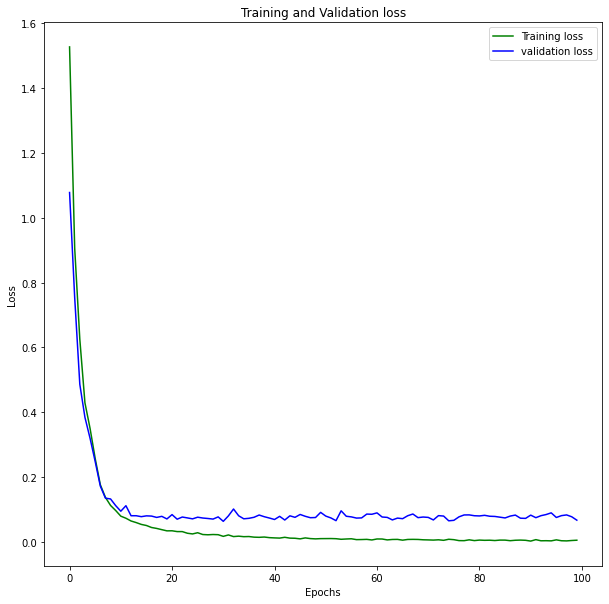

In [8]:
plt.figure(figsize=(10,10))
loss_train = history.history['loss'] # training loss
loss_val = history.history['val_loss'] # validation loss
epochs = range(0,100) # since epochs=100

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting Accuracy

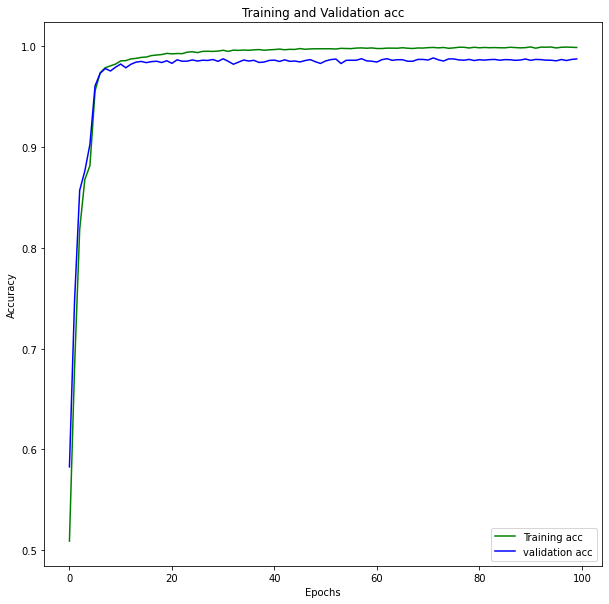

In [9]:
plt.figure(figsize=(10,10))
acc_train = history.history['acc'] 
acc_val = history.history['val_acc'] 
epochs = range(0,100) # since epochs=100

plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')

plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()